Working on some plotting tools for the BEM project. This will eventually get rolled into its own tool

In [9]:
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [10]:
my_data = genfromtxt('solution.csv', delimiter=',')
X = my_data[:,0]
Y = my_data[:,1]
inside = my_data[:,2]
Z = my_data[:,3]

X = X.reshape([100, 100]);
Y = Y.reshape([100, 100]);
inside = inside.reshape([100, 100]);
Z = Z.reshape([100, 100]);
Z[inside==0]=0

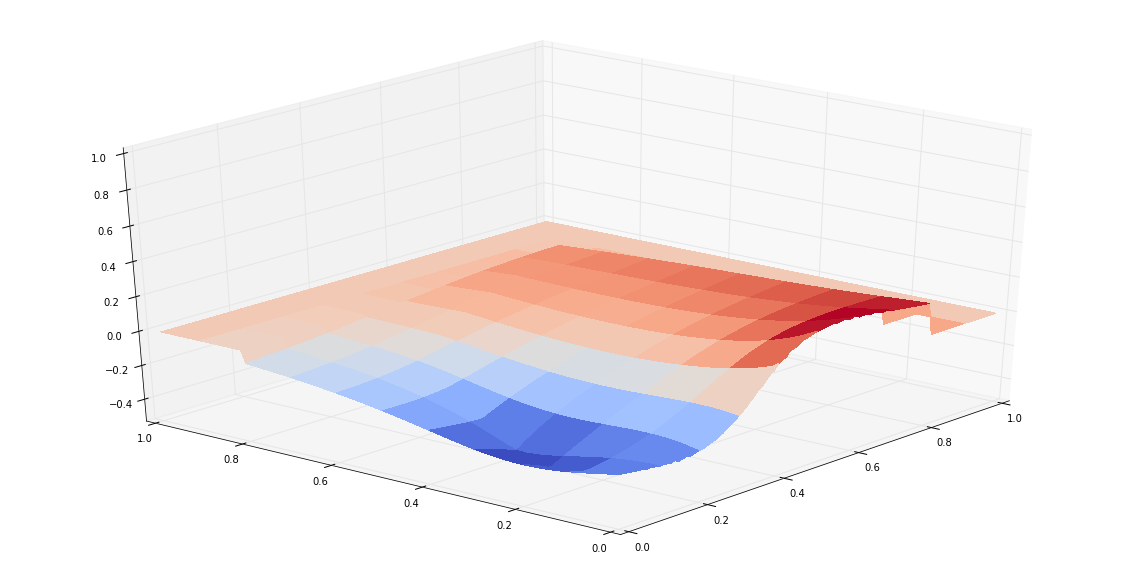

In [12]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, cmap=cm.coolwarm)
ax.set_zlim(-0.5, 1);
ax.set_xlim(0,1);
ax.set_ylim(0,1);
angle = 220
ax.view_init(30, angle)

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri
from scipy.spatial import Delaunay

points = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

tri = Delaunay(points)

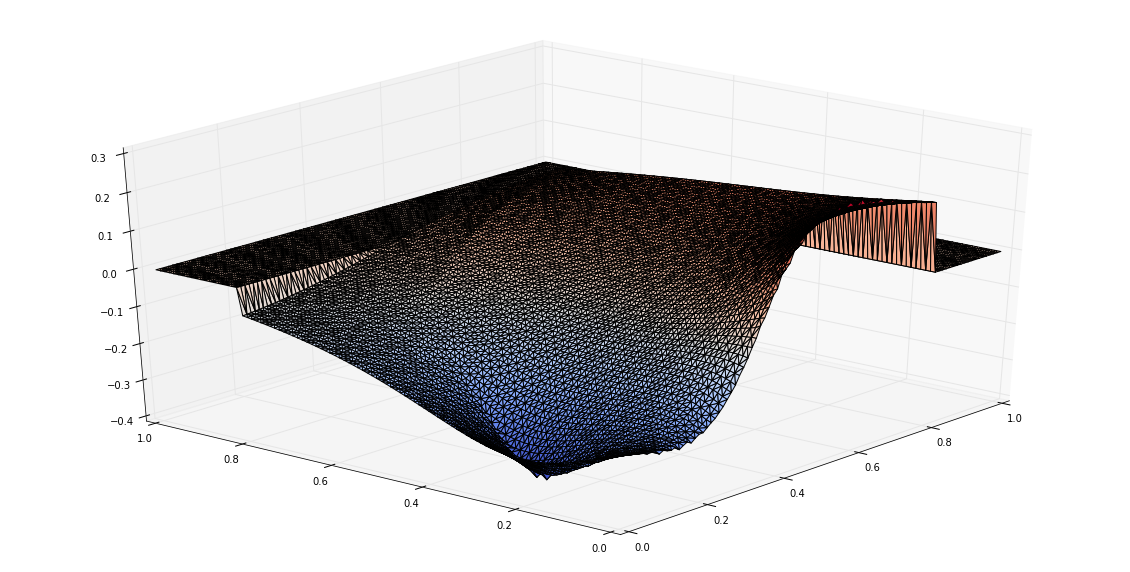

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X.flatten().T, Y.flatten().T, Z.flatten().T, triangles=tri.simplices, cmap=plt.cm.coolwarm)
angle = 220
ax.view_init(30, angle)
plt.show()

In [15]:
from stl import mesh
vertices = tri.points;
faces = tri.simplices;
# Create the mesh
sol = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        sol.vectors[i][j] = vertices[f[j],:]
        
sol.save('sol.stl')